# Credit Card Customer Delinquency Analysis

The objectives of this analysia and modelling are:
1) Provided certain features as in the dataset, how reliably is it possible to identify customers that would delinquet.
2) What are the characteristics of the customers that are highly correlated to delinquency.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

## Exploratory Data Analysis

#### A Peak into the Dataset

In [2]:
row_count = 0
chunksize = 100_000

for chunk in pd.read_csv("data/loan.csv", chunksize=chunksize):
    row_count += len(chunk)

print("Total rows:", row_count)

/tmp/ipykernel_72176/1909025961.py:4: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv("data/loan.csv", chunksize=chunksize):
/tmp/ipykernel_72176/1909025961.py:4: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv("data/loan.csv", chunksize=chunksize):
/tmp/ipykernel_72176/1909025961.py:4: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv("data/loan.csv", chunksize=chunksize):
/tmp/ipykernel_72176/1909025961.py:4: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv("data/loan.csv", chunksize=chunksize):
/tmp/ipykernel_72176/1909025961.py:4: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv("data/lo

Total rows: 887379


/tmp/ipykernel_72176/1909025961.py:4: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv("data/loan.csv", chunksize=chunksize):


There are in total 2,260,668 records in the dataset.

In [3]:
reader = pd.read_csv("data/loan.csv", iterator=True)
chunk = reader.get_chunk(100000)
print(chunk.columns)
print(len(chunk.columns))

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

There a 74 columns in the dataset and most of them might not be useful. We will need to go through the columns and see which columns could be important for our modelling.

In [4]:
chunk.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Initial Feature Selection

In [5]:
ID = ["id", "member_id"]
NUMERIC_FEATURES = ["loan_amnt", "int_rate", "installment", "annual_inc", "open_acc", ]
CATEGORICAL_FEATURES = ["term", "grade", "emp_length", "home_ownership", "verification_status", "purpose", "pub_rec"]
LABEL = ["loan_status"]

In [6]:
raw_df = pd.read_csv("data/loan.csv", usecols=ID+NUMERIC_FEATURES+CATEGORICAL_FEATURES+LABEL)
raw_df = raw_df.reindex(columns=ID+NUMERIC_FEATURES+CATEGORICAL_FEATURES+LABEL)

In [7]:
raw_df.head()

,id,member_id,loan_amnt,int_rate,installment,annual_inc,open_acc,term,grade,emp_length,home_ownership,verification_status,purpose,pub_rec,loan_status
0,1077501,1296599,5000.0,10.65,162.87,24000.0,3.0,36 months,B,10+ years,RENT,Verified,credit_card,0.0,Fully Paid
1,1077430,1314167,2500.0,15.27,59.83,30000.0,3.0,60 months,C,< 1 year,RENT,Source Verified,car,0.0,Charged Off
2,1077175,1313524,2400.0,15.96,84.33,12252.0,2.0,36 months,C,10+ years,RENT,Not Verified,small_business,0.0,Fully Paid
3,1076863,1277178,10000.0,13.49,339.31,49200.0,10.0,36 months,C,10+ years,RENT,Source Verified,other,0.0,Fully Paid
4,1075358,1311748,3000.0,12.69,67.79,80000.0,15.0,60 months,B,1 year,RENT,Source Verified,other,0.0,Current


In [8]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   887379 non-null  int64  
 1   member_id            887379 non-null  int64  
 2   loan_amnt            887379 non-null  float64
 3   int_rate             887379 non-null  float64
 4   installment          887379 non-null  float64
 5   annual_inc           887375 non-null  float64
 6   open_acc             887350 non-null  float64
 7   term                 887379 non-null  object 
 8   grade                887379 non-null  object 
 9   emp_length           842554 non-null  object 
 10  home_ownership       887379 non-null  object 
 11  verification_status  887379 non-null  object 
 12  purpose              887379 non-null  object 
 13  pub_rec              887350 non-null  float64
 14  loan_status          887379 non-null  object 
dtypes: float64(6), in

#### About the data

`id` A unique LC assigned ID for the loan listing. (Numerical)

`member_id` A unique LC assigned Id for the borrower member. (Numerical)

`loan_amnt` The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value. (Numerical)

`int_rate` Interest Rate on the loan. (Numerical)

`installment` The monthly payment owed by the borrower if the loan originates. (Numerical)

`annual_inc` The self-reported annual income provided by the borrower during registration. (Numerical)

`open_acc` The number of open credit lines in the borrower's credit file. (Numerical)

`term` The number of payments on the loan. Values are in months and can be either 36 months or 60 months. (Categorical - Ordinal).

`grade` LC assigned loan grade. A to G. (Categorical)

`emp_length` Employment length in years. Categorical feature needs to be encoded as ordinal categories. ['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years', '4 years', '5 years', '6 years', '2 years', '7 years', nan]. (Categorical)

`home_ownership` The home ownership status provided by the borrower during registration. ['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'] (Categorical)

`verification_status` LC verification of the annual income. ['Verified', 'Source Verified', 'Not Verified']. (Categorical)

`purpose` A category provided by the borrower for the loan request. 'credit_card', 'car', 'small_business', 'other', 'wedding', 'debt_consolidation', 'home_improvement', 'major_purchase', 'medical', 'moving', 'vacation', 'house', 'renewable_energy', 'educational'(Categorical)

`pub_rec` Number of derogatory public records. Numeric feature but for modelling we encode it as ordinal categories (Categorical)

`loan_status` Current status of the loan. This column indicates whether the customer is delinquent or not if we categorize it further. Possible entries are ['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'] (Categorical)

### Data Cleaning

In [9]:
def encode_employment_length(entry: str) -> float:
    categories = ['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years']
    if entry in categories:
        mapping = {"< 1 year": 0.5, "1 year": 1.0, "2 years": 2.0, "3 years": 3.0, "4 years": 4.0,
                   "5 years": 5.0, "6 years": 6.0, "7 years": 7.0, "8 years": 8.0, "9 years": 9.0,
                   "10+ years": 10.0}
        return mapping[entry]
    else:
        return 0.0

def encode_loan_status(entry: str) -> int:
    if entry in ["Fully Paid", "Does not meet the credit policy. Status:Fully Paid"]:
        return 0
    if entry in ["Default", "Late (31-120 days)", "In Grace Period", "Late (16-30 days)",
                 "Does not meet the credit policy. Status:Charged Off"]:
        return 1
    else:
        return 2

def encoder_pub_rec(entry: str) -> int:
    if entry in np.arange(0,9,1):
        return int(entry)
    if entry > 9:
        return 10
    else:
        return 0

In [10]:
raw_df["emp_length"] = raw_df["emp_length"].apply(lambda entry: encode_employment_length(entry))
raw_df["loan_status"] = raw_df["loan_status"].apply(lambda entry: encode_loan_status(entry))
raw_df["pub_rec"] = raw_df["pub_rec"].apply(lambda entry: encoder_pub_rec(entry))

In [11]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   887379 non-null  int64  
 1   member_id            887379 non-null  int64  
 2   loan_amnt            887379 non-null  float64
 3   int_rate             887379 non-null  float64
 4   installment          887379 non-null  float64
 5   annual_inc           887375 non-null  float64
 6   open_acc             887350 non-null  float64
 7   term                 887379 non-null  object 
 8   grade                887379 non-null  object 
 9   emp_length           887379 non-null  float64
 10  home_ownership       887379 non-null  object 
 11  verification_status  887379 non-null  object 
 12  purpose              887379 non-null  object 
 13  pub_rec              887379 non-null  int64  
 14  loan_status          887379 non-null  int64  
dtypes: float64(6), in

In [12]:
raw_df.rename(columns={"loan_status": "delinquent"}, inplace=True)

In [13]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   887379 non-null  int64  
 1   member_id            887379 non-null  int64  
 2   loan_amnt            887379 non-null  float64
 3   int_rate             887379 non-null  float64
 4   installment          887379 non-null  float64
 5   annual_inc           887375 non-null  float64
 6   open_acc             887350 non-null  float64
 7   term                 887379 non-null  object 
 8   grade                887379 non-null  object 
 9   emp_length           887379 non-null  float64
 10  home_ownership       887379 non-null  object 
 11  verification_status  887379 non-null  object 
 12  purpose              887379 non-null  object 
 13  pub_rec              887379 non-null  int64  
 14  delinquent           887379 non-null  int64  
dtypes: float64(6), in

In [14]:
raw_df.isnull().sum()

id                      0
member_id               0
loan_amnt               0
int_rate                0
installment             0
annual_inc              4
open_acc               29
term                    0
grade                   0
emp_length              0
home_ownership          0
verification_status     0
purpose                 0
pub_rec                 0
delinquent              0
dtype: int64

We see there are missing values for `annual_inc`, `open_acc`, and `pub_rec`. Since the proportion of missing values to the full dataset is very less, we can simply drop them.

In [15]:
raw_df = raw_df.dropna()

In [16]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 887350 entries, 0 to 887378
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   887350 non-null  int64  
 1   member_id            887350 non-null  int64  
 2   loan_amnt            887350 non-null  float64
 3   int_rate             887350 non-null  float64
 4   installment          887350 non-null  float64
 5   annual_inc           887350 non-null  float64
 6   open_acc             887350 non-null  float64
 7   term                 887350 non-null  object 
 8   grade                887350 non-null  object 
 9   emp_length           887350 non-null  float64
 10  home_ownership       887350 non-null  object 
 11  verification_status  887350 non-null  object 
 12  purpose              887350 non-null  object 
 13  pub_rec              887350 non-null  int64  
 14  delinquent           887350 non-null  int64  
dtypes: float64(6), int64(4

We need to consider only the customers who have fully paid loan amount or who are delinquent. Customers who are actively paying installments cannot yet be classified into delinquent or not. These customers can be dropped from the dataset.

In [17]:
retained_df = raw_df.loc[raw_df["delinquent"]!=2]
retained_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 231863 entries, 0 to 887369
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   231863 non-null  int64  
 1   member_id            231863 non-null  int64  
 2   loan_amnt            231863 non-null  float64
 3   int_rate             231863 non-null  float64
 4   installment          231863 non-null  float64
 5   annual_inc           231863 non-null  float64
 6   open_acc             231863 non-null  float64
 7   term                 231863 non-null  object 
 8   grade                231863 non-null  object 
 9   emp_length           231863 non-null  float64
 10  home_ownership       231863 non-null  object 
 11  verification_status  231863 non-null  object 
 12  purpose              231863 non-null  object 
 13  pub_rec              231863 non-null  int64  
 14  delinquent           231863 non-null  int64  
dtypes: float64(6), int64(4

In [18]:
print(f"The proportion of the total dataset retained for modelling: {len(retained_df)/len(raw_df):.2f}")
del raw_df

The proportion of the total dataset retained for modelling: 0.26


So we have retained around 26% (231,863 datapoints) of the whole dataset for our modelling purpose.

### Data Distribution Analysis

#### Distributiion of Numerical Features

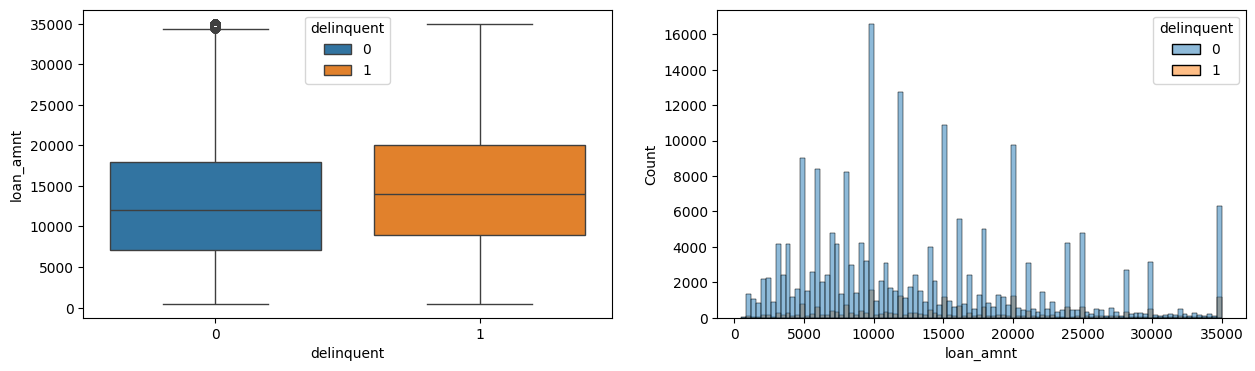

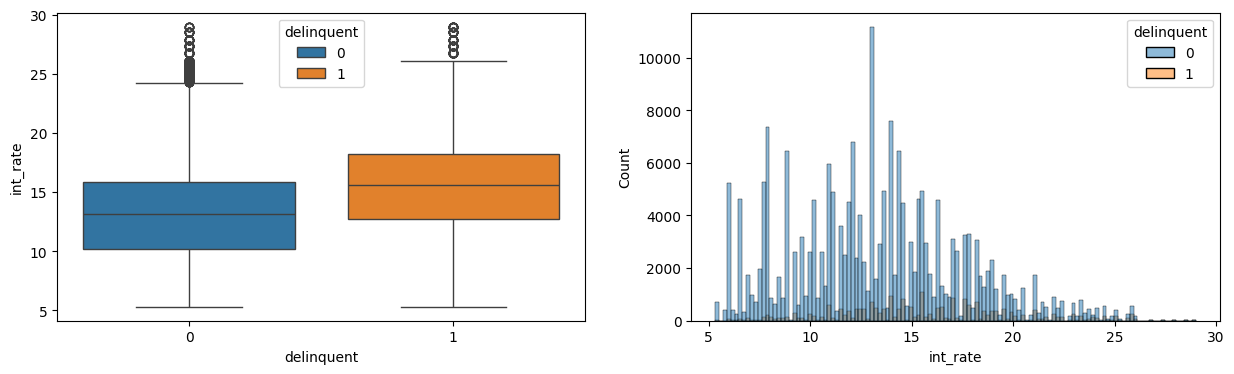

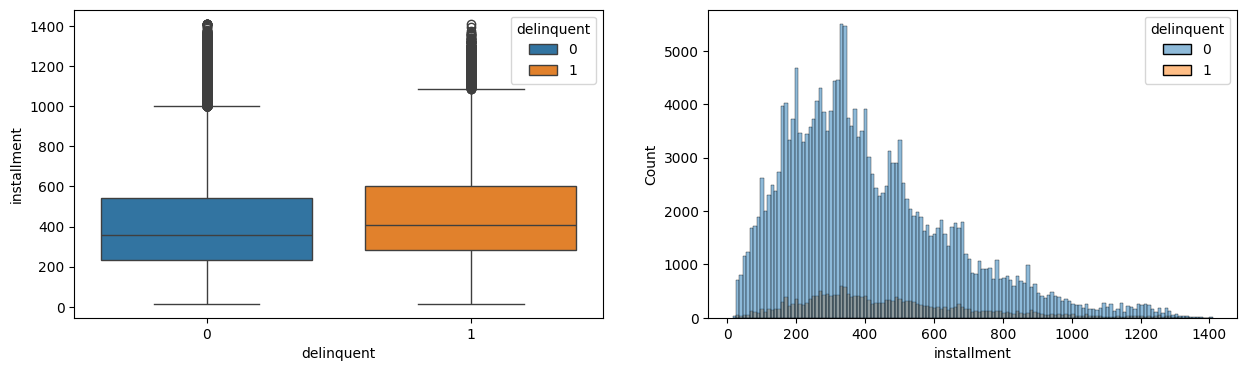

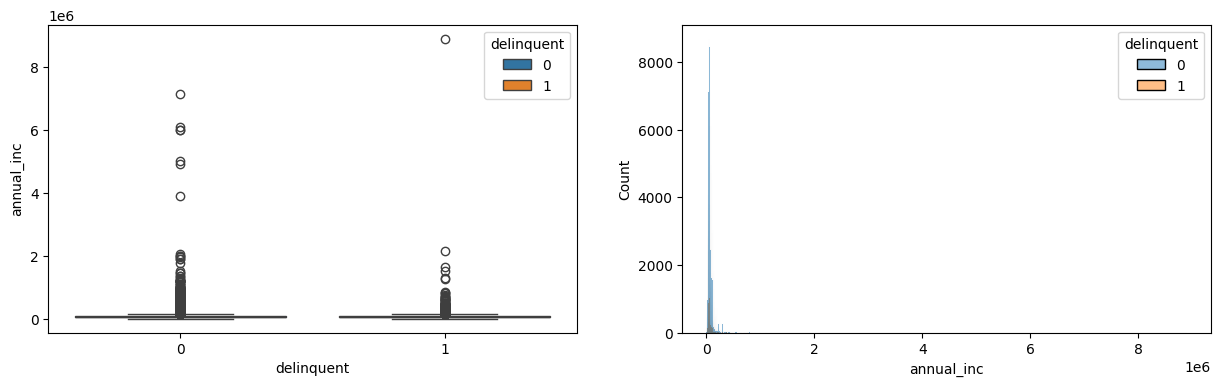

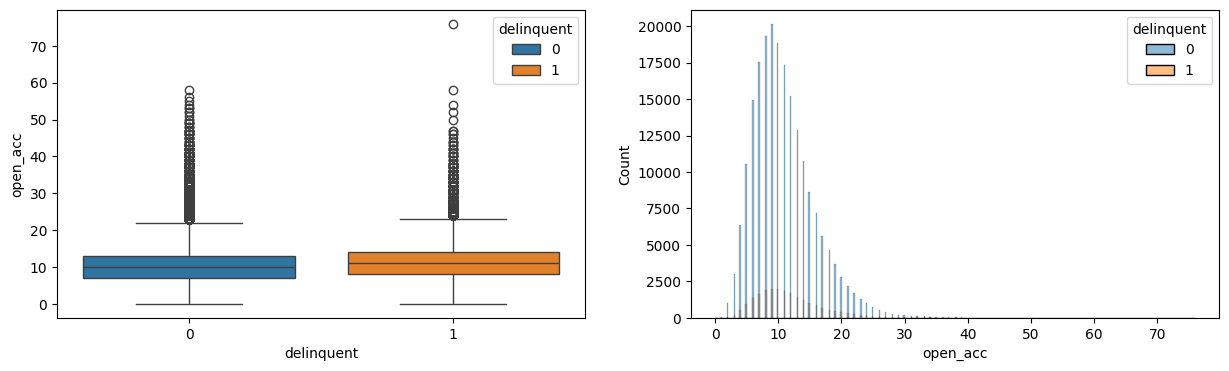

In [19]:
for attribute in NUMERIC_FEATURES:
    plt.figure(figsize=(15, 4))
    plt.subplot(1,2,1)
    sns.boxplot(retained_df, y=attribute, x="delinquent", hue="delinquent")
    plt.subplot(1,2,2)
    sns.histplot(retained_df, x=attribute, hue="delinquent")
    plt.show()

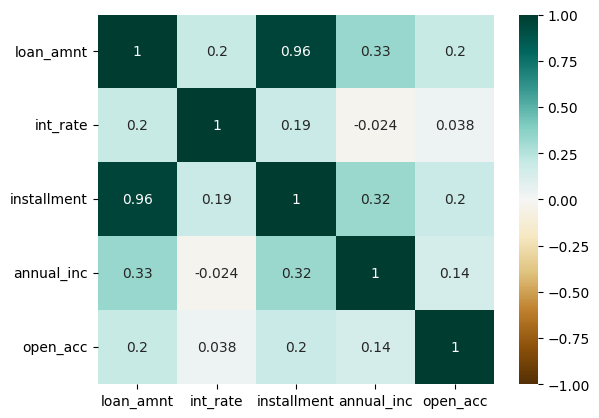

In [20]:
sns.heatmap(retained_df[NUMERIC_FEATURES].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.show()

From the distributions we observe the following:

1) There are significant outliers in `annual_inc`, and `open_acc`. These outliers are to be removed for our modelling. The outliers can be analyzed seperately.
2) There is high corelation between the `loan_amnt` and `installment`. So we can drop `installment` from the features.
3) There distributions are more or less normal if outliers are removed.

#### Ditribution of Categorical Features

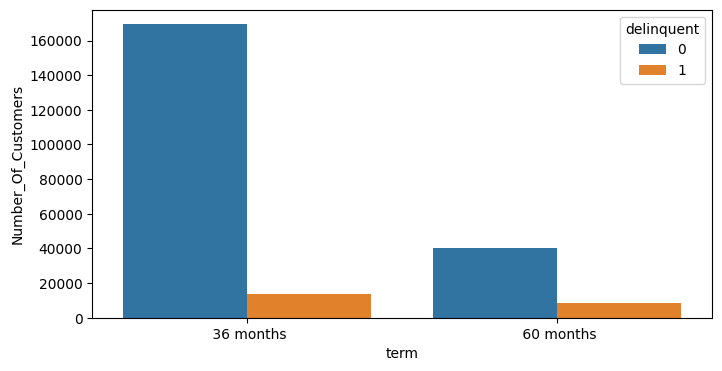

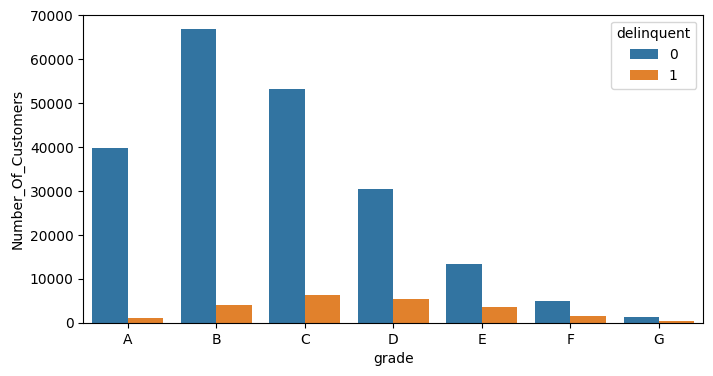

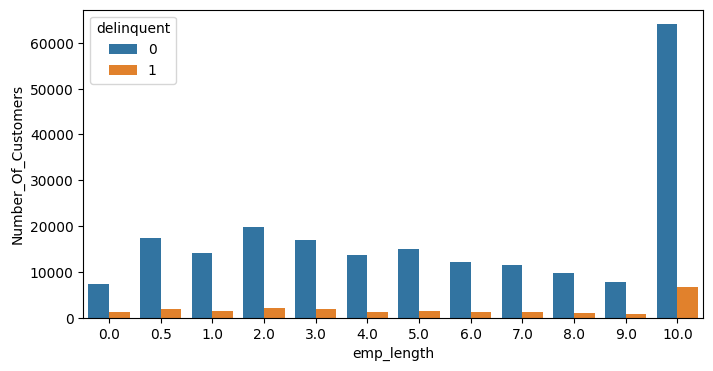

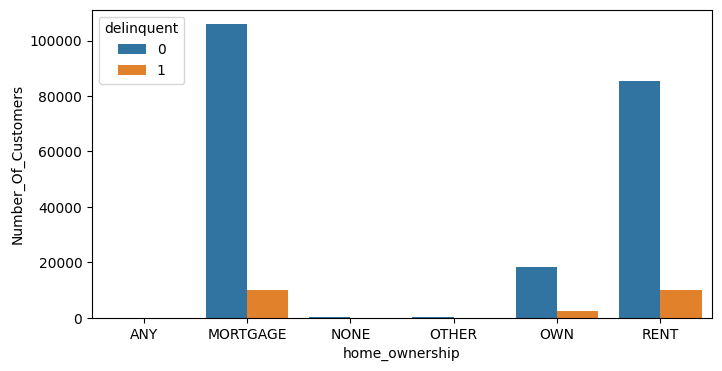

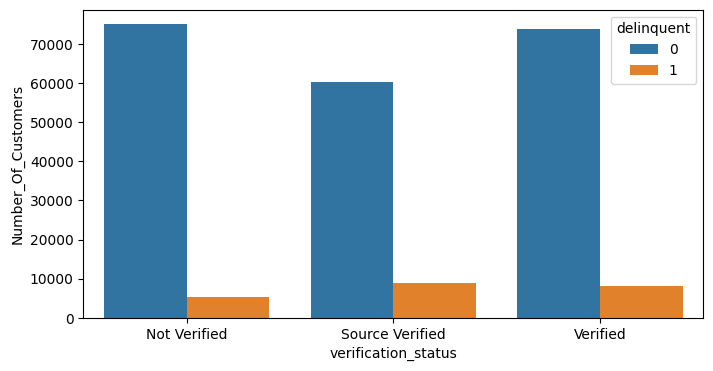

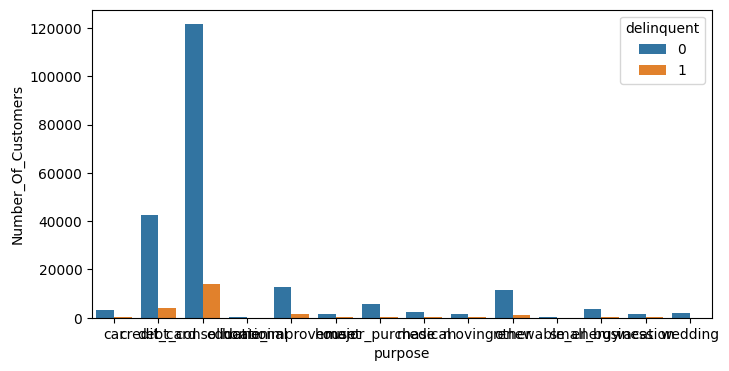

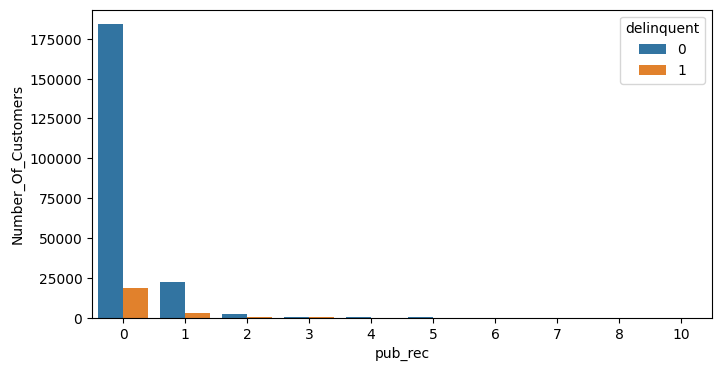

In [21]:
for feature in CATEGORICAL_FEATURES:
    agg_df = retained_df.groupby(by=[feature, "delinquent"], as_index=False).agg(Number_Of_Customers=("member_id", "count"))
    plt.figure(figsize=(8, 4))
    sns.barplot(agg_df, x=feature, y="Number_Of_Customers", hue="delinquent")
    plt.show()


In [22]:
retained_df.groupby(by="delinquent")["member_id"].count()/len(retained_df)

delinquent
0    0.904349
1    0.095651
Name: member_id, dtype: float64

Before modelling, let us remove the outliers to analyze it seperately

### Outliers Removal

In [23]:
annual_inc_Q1 = retained_df["annual_inc"].quantile(0.25)
annual_inc_Q3 = retained_df["annual_inc"].quantile(0.75)
annual_inc_IQR = annual_inc_Q3 - annual_inc_Q1
annual_inc_lower_thresh = annual_inc_Q1 - 1.5 * annual_inc_IQR
annual_inc_upper_thresh = annual_inc_Q3 + 1.5 * annual_inc_IQR
annual_inc_outliers_indices = retained_df.loc[(retained_df["annual_inc"]>annual_inc_upper_thresh) |
                                              (retained_df["annual_inc"]<annual_inc_lower_thresh)].index

open_acc_Q1 = retained_df["open_acc"].quantile(0.25)
open_acc_Q3 = retained_df["open_acc"].quantile(0.75)
open_acc_IQR = open_acc_Q3 - open_acc_Q1
open_acc_lower_thresh = open_acc_Q1 - 1.5 * open_acc_IQR
open_acc_upper_thresh = open_acc_Q3 + 1.5 * open_acc_IQR
open_acc_outliers_indices = retained_df.loc[(retained_df["open_acc"]>open_acc_upper_thresh) |
                                              (retained_df["open_acc"]<open_acc_lower_thresh)].index

In [24]:
outlier_indices = annual_inc_outliers_indices.union(open_acc_outliers_indices)
non_outliers_indices = retained_df.index.difference(outlier_indices)

In [25]:
non_outliers_df = retained_df.loc[non_outliers_indices]
outliers_df = retained_df.loc[outlier_indices]

In [26]:
print(f"Proportion of data retained after remaining outliers: {len(non_outliers_df)/len(retained_df)}")

Proportion of data retained after remaining outliers: 0.9452650918861569


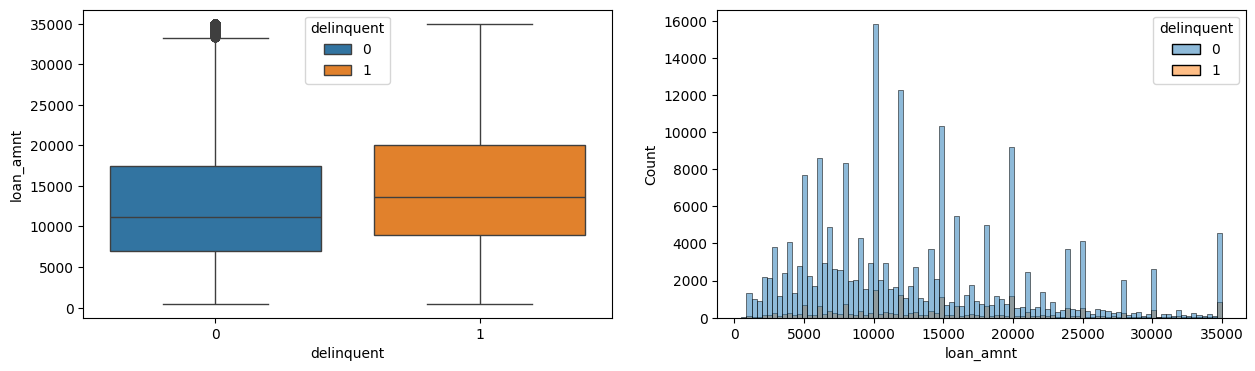

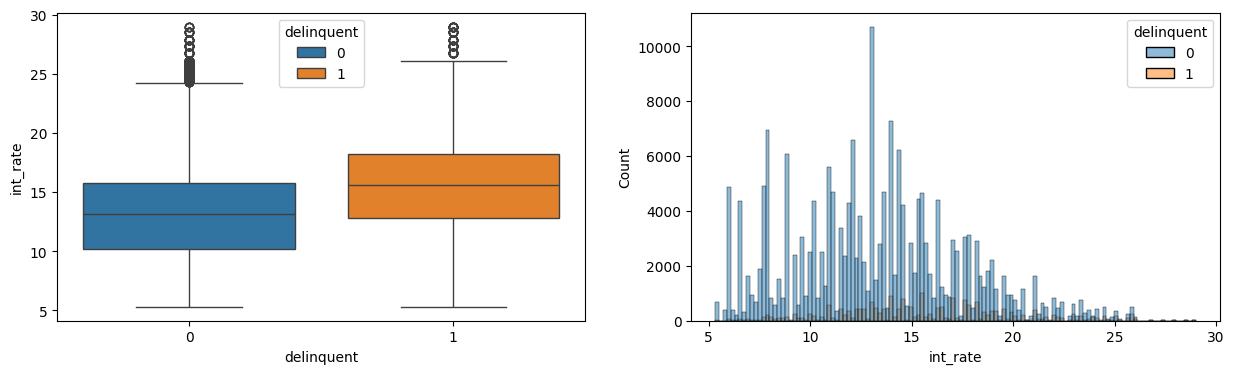

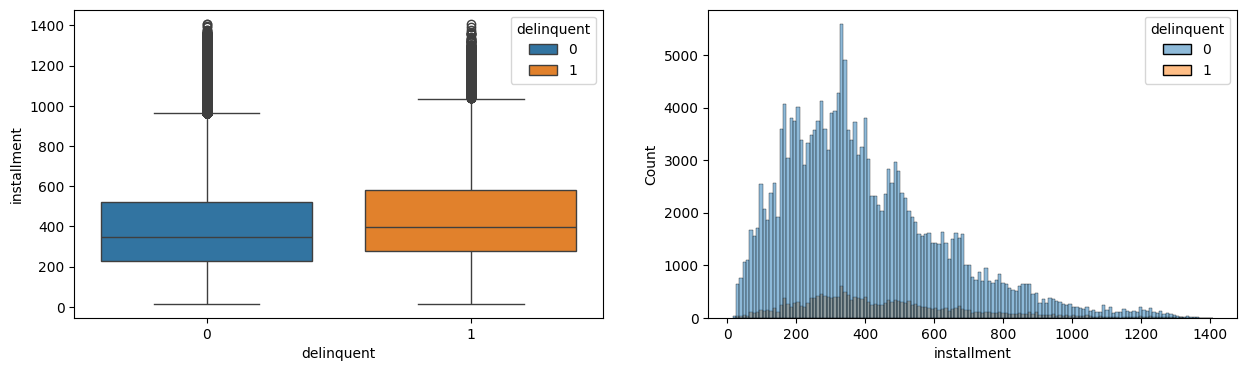

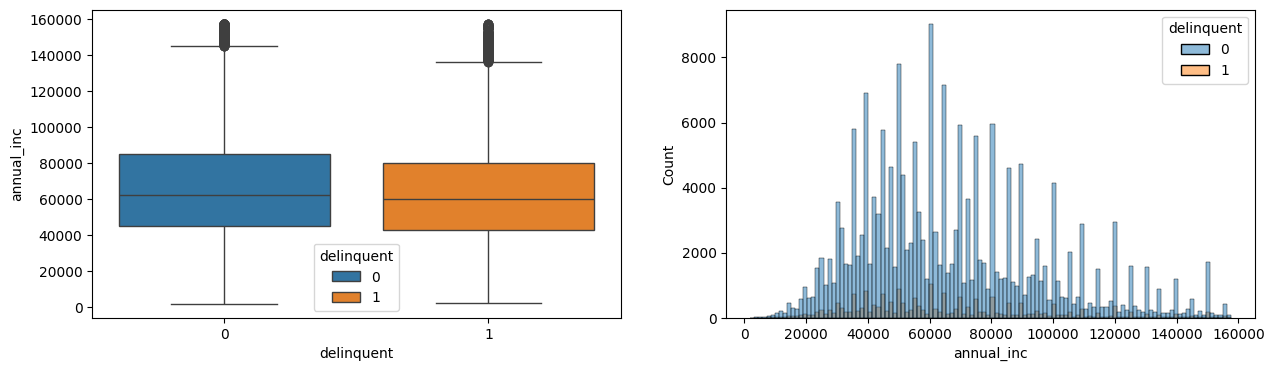

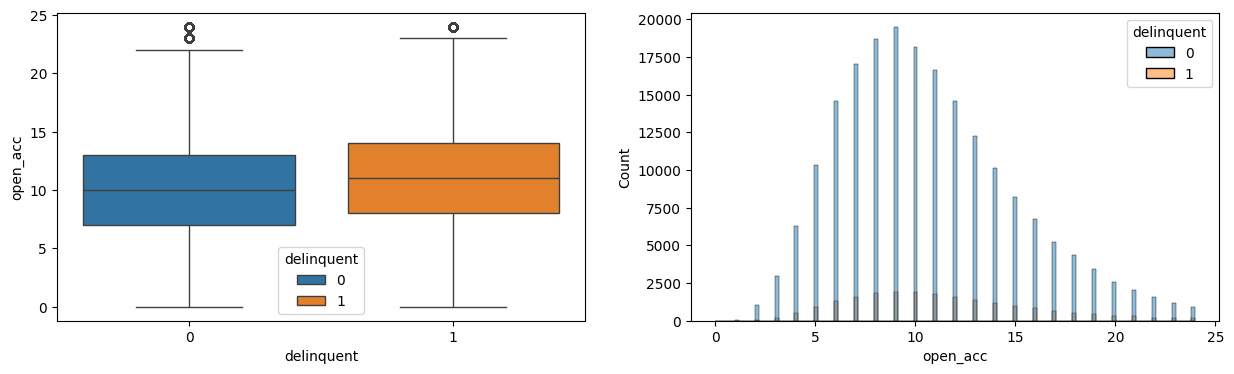

In [27]:
for attribute in NUMERIC_FEATURES:
    plt.figure(figsize=(15, 4))
    plt.subplot(1,2,1)
    sns.boxplot(non_outliers_df, y=attribute, x="delinquent", hue="delinquent")
    plt.subplot(1,2,2)
    sns.histplot(non_outliers_df, x=attribute, hue="delinquent")
    plt.show()

In [ ]:
retained_df.drop(columns=["installment"], inplace=True)
non_outliers_df.drop(columns=["installment"], inplace=True)
outliers_df.drop(columns=["installment"], inplace=True)

We proceed with the retained features as below:

In [28]:
NUMERIC_FEATURES = ["loan_amnt", "int_rate", "annual_inc", "open_acc"]
CATEGORICAL_FEATURES = ["term", "grade", "emp_length", "home_ownership", "verification_status", "purpose", "pub_rec"]
LABEL = ["delinquent"]

In [29]:
non_outliers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219172 entries, 0 to 887369
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   219172 non-null  int64  
 1   member_id            219172 non-null  int64  
 2   loan_amnt            219172 non-null  float64
 3   int_rate             219172 non-null  float64
 4   installment          219172 non-null  float64
 5   annual_inc           219172 non-null  float64
 6   open_acc             219172 non-null  float64
 7   term                 219172 non-null  object 
 8   grade                219172 non-null  object 
 9   emp_length           219172 non-null  float64
 10  home_ownership       219172 non-null  object 
 11  verification_status  219172 non-null  object 
 12  purpose              219172 non-null  object 
 13  pub_rec              219172 non-null  int64  
 14  delinquent           219172 non-null  int64  
dtypes: float64(6), int64(4

In [30]:
non_outliers_df.groupby(by="delinquent").agg(proportion_of_customers=("member_id", "count"))/len(non_outliers_df)

,proportion_of_customers
delinquent,
0,0.905316
1,0.094684


We have around 9.5% delinquent customers in the dataset.

The dataset is imbalanced and hence accuracy would not be a relaible metric. Since it is important that we get all the delinquent customers correctly even though some non-delinquent customers are classified as delinquent,the appropriate evaluation metric for our model would be `Recall`.

$$
Recall = \frac{TP}{TP + FN}
$$

Further if we classify all the customers as delinquent, it would give us 100% recall. This is also not desirable because we want to keep the False Positives also at a minimal or have a decent precision. So we also have to consider the `Precison-Recall-AUC` metric for evaluation. A high `Precison-Recall-AUC` is desired with more emphasis on Recall from business perspective.

### Saving the Cleaned Dataset 

In [ ]:
outliers_df.to_csv("data/loan_outliers.csv")
non_outliers_df.to_csv("data/loan_non_outliers.csv")

### Loading the Cleaned Dataset 

In [31]:
# directly load cleaned data
non_outliers_df = pd.read_csv("data/loan_non_outliers.csv", index_col=0)

## Modelling

#### Train-Vaildation-Test Split

Let us divide the dataset into train, validation, and test subsets. 

- For training and validation 85% of the data.
- For testing 15% of the data.
- For Validation 15% of the 85% data.

Since the dataset is heavily imbalanced we need to use the delinquency column for stratified split. 

In [32]:
from sklearn.metrics import accuracy_score, precision_score, \
                            roc_auc_score, f1_score, recall_score, average_precision_score,\
                            confusion_matrix, \
                            ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
RANDOM_STATE = 42

In [33]:
def train_test_split(df: pd.DataFrame, stratify_by_column: str) \
    -> tuple[pd.DataFrame, pd.DataFrame]:
    splitter_1 = StratifiedShuffleSplit(n_splits=1,
                                      test_size=0.15,
                                      random_state=RANDOM_STATE)
    for df_train_val_ind, df_test_ind in splitter_1.split(df, df[stratify_by_column]):
        df_train_val = df.loc[df_train_val_ind]
        df_test = df.loc[df_test_ind]
    splitter_2 = StratifiedShuffleSplit(n_splits=1,
                                      test_size=0.15,
                                      random_state=RANDOM_STATE)
    for df_train_ind, df_val_ind in splitter_2.split(df_train_val, df_train_val[stratify_by_column]):
        df_train = df.loc[df_train_ind]
        df_val = df.loc[df_val_ind]
    return df_train, df_val, df_test

In [34]:
df_train, df_val, df_test = train_test_split(non_outliers_df.reset_index(), "delinquent")

In [ ]:
print(f"Train dataset samples: {df_train.shape[0]}")
print(f"Validation dataset samples: {df_val.shape[0]}")
print(f"Test dataset samples: {df_test.shape[0]}")

Train dataset samples: 158351
Validation dataset samples: 27945
Test dataset samples: 32876


#### Metrics

In [42]:
def print_results(y_train, y_train_pred, y_val, y_val_pred):
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    train_precision = precision_score(y_train, y_train_pred)
    val_precision = precision_score(y_val, y_val_pred)
    train_recall = recall_score(y_train, y_train_pred)
    val_recall = recall_score(y_val, y_val_pred)
    train_f1score = f1_score(y_train, y_train_pred)
    val_f1score = f1_score(y_val, y_val_pred)
    train_roc_auc = roc_auc_score(y_train, y_train_pred)
    val_roc_auc = roc_auc_score(y_val, y_val_pred)
    train_pr_auc = average_precision_score(y_train, y_train_pred)
    val_pr_auc = average_precision_score(y_val, y_val_pred)
    train_cm = confusion_matrix(y_train, y_train_pred)
    val_cm = confusion_matrix(y_val, y_val_pred)
    print(f"Accuracy::: Train: {train_accuracy:.2f} Validation: {val_accuracy:.2f}")
    print(f"Precison::: Train: {train_precision:.2f} Validation: {val_precision:.2f}")
    print(f"Recall::: Train: {train_recall:.2f} Validation: {val_recall:.2f}")
    print(f"F1_Score::: Train: {train_f1score:.2f} Validation: {val_f1score:.2f}")
    print(f"ROC_AUC::: Train: {train_roc_auc:.2f} Validation: {val_roc_auc:.2f}")
    print(f"Precision_Recall_AUC::: Train: {train_pr_auc:.2f} Validation: {val_pr_auc:.2f}")
    train_cm_display = ConfusionMatrixDisplay(train_cm)
    train_cm_display.plot()
    val_cm_display = ConfusionMatrixDisplay(val_cm)
    val_cm_display.plot()
    plt.show()

def show_feature_importance(model, feature_names):
    feature_importance = pd.DataFrame(model.feature_importances_, index=feature_names, columns=["feature_importance"]).sort_values(by=["feature_importance"], ascending=False)
    plt.figure(figsize=(8, 16))
    sns.barplot(feature_importance, y=feature_importance.index, x="feature_importance")
    plt.show()

#### Random Forest Model - Balanced Class Weights

In [37]:
def data_preprocessing_pipeline_RF(df: pd. DataFrame, dataset: str = "train",
                                transformer: ColumnTransformer = None):
    NUMERIC_FEATURES = ["loan_amnt", "int_rate", "annual_inc", "open_acc", "emp_length", "pub_rec"]
    CATEGORICAL_FEATURES = ["term", "grade", "home_ownership", "verification_status", "purpose"]
    LABEL = ["delinquent"]
    y = df[LABEL]
    X = df.reindex(columns=NUMERIC_FEATURES+CATEGORICAL_FEATURES)
    if dataset == "train":
        transformer = ColumnTransformer(transformers=[("onehot", OneHotEncoder(sparse_output=False), CATEGORICAL_FEATURES)],
                                                      remainder="passthrough")
        transformed_dataset = transformer.fit_transform(X)
        encoded_column_names = transformer.named_transformers_["onehot"].get_feature_names_out(CATEGORICAL_FEATURES)
        X = pd.DataFrame(transformed_dataset, columns=NUMERIC_FEATURES+list(encoded_column_names))
        return X, y, transformer
    else:
        if transformer is None:
            print("You need to pass the transformer trained on the training set.")
            raise AttributeError
        else:
            transformed_dataset = transformer.transform(X)
            encoded_column_names = transformer.named_transformers_["onehot"].get_feature_names_out(CATEGORICAL_FEATURES)
            X = pd.DataFrame(transformed_dataset, columns=NUMERIC_FEATURES+list(encoded_column_names))
            return X, y

In [38]:
X_train_rf, y_train_rf, transformer_rf = data_preprocessing_pipeline_RF(df_train, "train")
X_val_rf, y_val_rf = data_preprocessing_pipeline_RF(df_val, "val", transformer_rf)
#X_test, y_test = data_preprocessing_pipeline_RF(df_test, "test", transformer)

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Grid search for best hyper-parameters
from sklearn.model_selection import GridSearchCV
grid = [{"max_depth": [3, 4, 5], "max_features": [2, 3, 4, 5, 6, 7, 8],"n_estimators": [50, 60, 70, 80, 90, 100], "bootstrap": [True, False]}]
rf_model = RandomForestClassifier()
grid_search = GridSearchCV(rf_model, grid, cv=10, scoring="roc_auc", n_jobs=-1, verbose=1)
grid_search.fit(X_train_rf, y_train_rf)
print(grid_search.best_params_)

In [40]:
model_rf = RandomForestClassifier(n_estimators=50, max_features=12, max_depth=5, bootstrap=True, class_weight="balanced")
model_rf.fit(X_train_rf, y_train_rf)

/home/brian/Extras/Programming-Projects/git-projects/customer-delinquency-credit-card/.venv/lib/python3.10/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=12,
                       n_estimators=50)

Accuracy::: Train: 0.57 Validation: 0.56
Precison::: Train: 0.10 Validation: 0.09
Recall::: Train: 0.75 Validation: 0.72
F1_Score::: Train: 0.18 Validation: 0.17
ROC_AUC::: Train: 0.65 Validation: 0.64
Precision_Recall_AUC::: Train: 0.09 Validation: 0.09


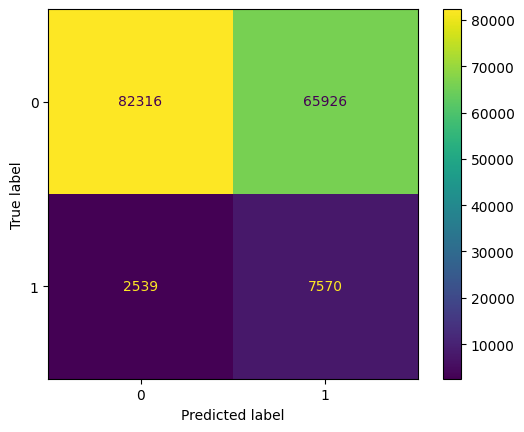

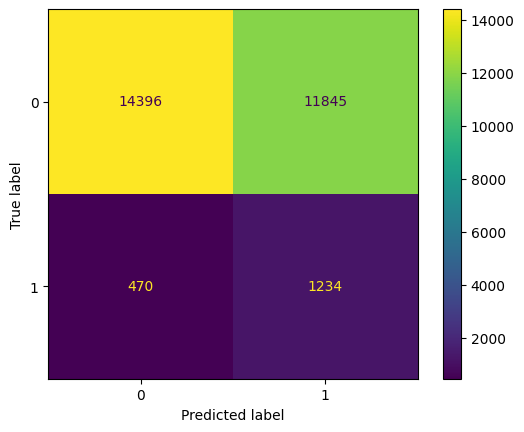

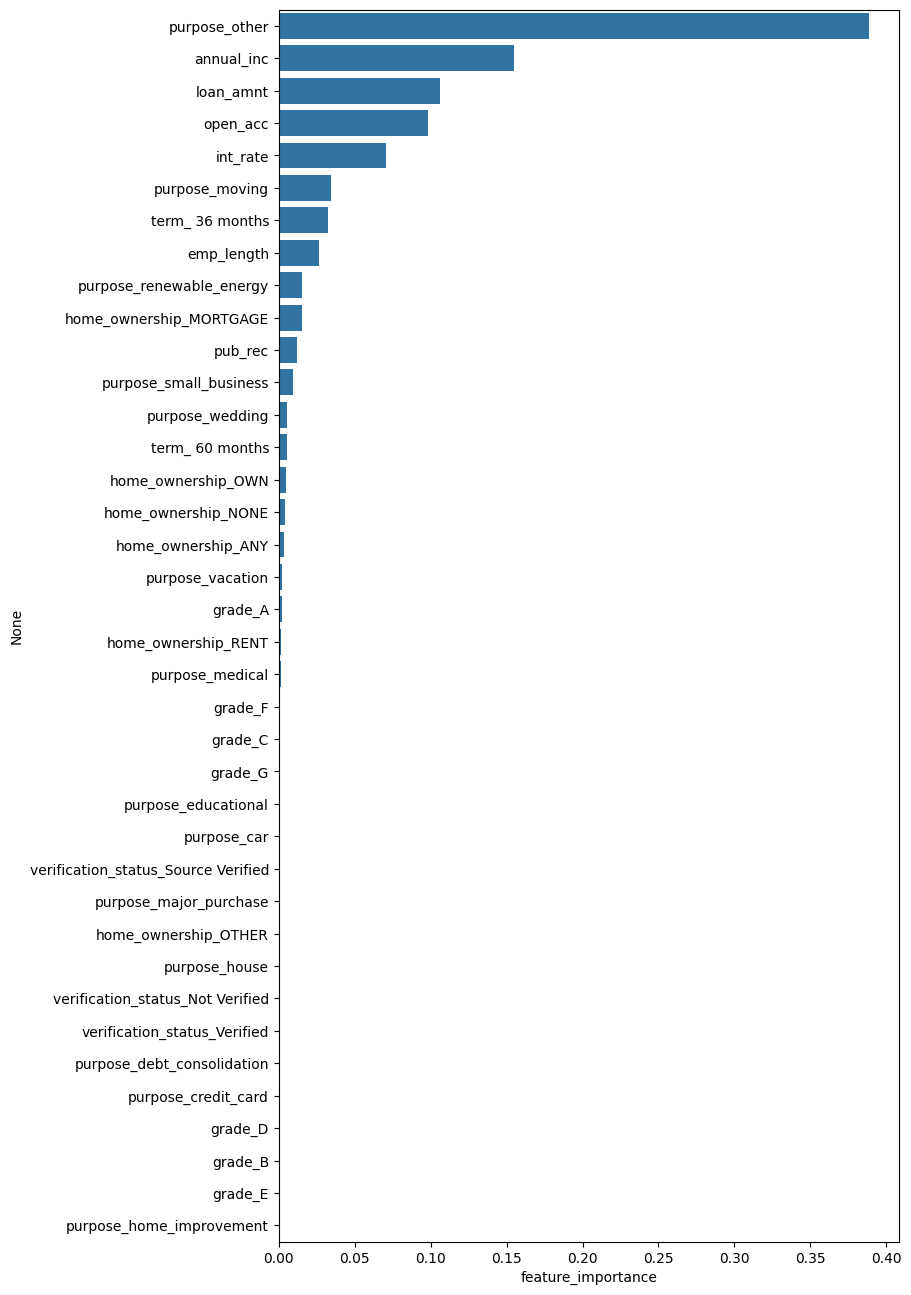

In [43]:
y_train_pred_rf = model_rf.predict(X_train_rf)
y_val_pred_rf = model_rf.predict(X_val_rf)
#y_test_pred = model.predict(X_test)
print_results(y_train_rf, y_train_pred_rf, y_val_rf, y_val_pred_rf)
show_feature_importance(model_rf, X_train_rf.columns)

Accuracy::: Train: 0.57 Validation: 0.56
Precison::: Train: 0.10 Validation: 0.09
Recall::: Train: 0.75 Validation: 0.72
F1_Score::: Train: 0.18 Validation: 0.17
ROC_AUC::: Train: 0.65 Validation: 0.64
Precision_Recall_AUC::: Train: 0.09 Validation: 0.09

The Random Forest model has a decent recall of 0.72 which means model flags a good proportion of delinquent customers. However the precison of 0.09 indicates lots of false postives. That is out of 100 flagged customers, 81 customers are wrongly flagged. This is not desirable because it costs company in terms of not getting revenue from customers who are not going to be delinquent.

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
smote = SMOTE(random_state=RANDOM_STATE)
rus = RandomUnderSampler(random_state=RANDOM_STATE)

In [ ]:
X_res, y_res = rus.fit_resample(X_train_rf, y_train_rf)

In [ ]:
model_rf_s = RandomForestClassifier(n_estimators=50, max_features=12, max_depth=5, bootstrap=True, class_weight="balanced_subsample")
model_rf_s.fit(X_res, y_res)

In [ ]:
y_train_pred_rf_s = model_rf_s.predict(X_train_rf)
y_val_pred_rf_s = model_rf_s.predict(X_val_rf)
#y_test_pred = model.predict(X_test)
print_results(y_train_rf, y_train_pred_rf_s, y_val_rf, y_val_pred_rf_s)

This results did not improve with SMOTE, rather they are not acceptable. Let us try other algorithms

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
def data_preprocessing_pipeline_CB(df: pd. DataFrame):
    NUMERIC_FEATURES = ["loan_amnt", "int_rate", "annual_inc", "open_acc", "emp_length", "pub_rec"]
    CATEGORICAL_FEATURES = ["term", "grade", "home_ownership", "verification_status", "purpose"]
    LABEL = ["delinquent"]
    y = df[LABEL]
    X = df.reindex(columns=NUMERIC_FEATURES+CATEGORICAL_FEATURES)
    return X, y, CATEGORICAL_FEATURES

In [ ]:
model_cb = CatBoostClassifier(
    iterations=2000,
    learning_rate=0.05,
    depth=6,
    eval_metric='AUC',       # or 'Recall' if optimizing that
    class_weights=[1, 10],   # Adjust based on imbalance ratio
    verbose=100,
    random_seed=42
)

In [ ]:
X_train_cb, y_train_cb, cat_features = data_preprocessing_pipeline_CB(df_train)
X_val_cb, y_val_cb, _ = data_preprocessing_pipeline_CB(df_val)
#X_test, y_test, _ = data_preprocessing_pipeline_CB(df_test)

In [ ]:
model_cb.fit(X_train_cb, y_train_cb, cat_features=cat_features, eval_set=(X_val_cb, y_val_cb), early_stopping_rounds=50)

In [ ]:
y_train_pred_cb = model_cb.predict(X_train_cb)
y_val_pred_cb = model_cb.predict(X_val_cb)
#y_test_pred_cb = model.predict(X_test_cb)
print_results(y_train_cb, y_train_pred_cb, y_val_cb, y_val_pred_cb)

In [ ]:
def blended_model_predictions(model_rf, model_cb):
    y_train_pred_prob_rf = model_rf.predict_proba(X_train_rf)
    y_val_pred_prob_rf = model_rf.predict_proba(X_val_rf)
    y_train_pred_prob_cb = model_cb.predict_proba(X_train_cb)
    y_val_pred_prob_cb = model_cb.predict_proba(X_val_cb)
    y_train_pred = (y_train_pred_prob_rf + y_train_pred_prob_cb) * 0.5
    y_val_pred = (y_val_pred_prob_rf + y_val_pred_prob_cb) * 0.5
    y_train_pred = np.argmax(y_train_pred, axis=1)
    y_val_pred = np.argmax(y_val_pred, axis=1)
    print_results(y_train_cb, y_train_pred, y_val_cb, y_val_pred)

In [ ]:
blended_model_predictions(model_rf, model_cb)

**Train Set**

| Model | Accuracy | Precision | Recall | F_1 | ROC_AUC | PR_AUC |
| ----- | -------- | --------- | ------ | --- | ------- | ------ |
| Random Forest | 0.58 | 0.10 | 0.74 | 0.18 | 0.65 | 0.09 |
| Cat Boost | 0.81 | 0.19 | 0.62 | 0.30 | 0.72 | 0.14 |
| Blend | 0.76 | 0.16 | 0.65 | 0.26 | 0.71 | 0.13 |


**Validation Set**

| Model | Accuracy | Precision | Recall | F_1 | ROC_AUC | PR_AUC |
| ----- | -------- | --------- | ------ | --- | ------- | ------ |
| Random Forest | 0.57 | 0.10 | 0.72 | 0.17 | 0.64 | 0.09 |
| Cat Boost | 0.80 | 0.16 | 0.54 | 0.25 | 0.68 | 0.11 |
| Blend | 0.76 | 0.14 | 0.60 | 0.23 | 0.68 | 0.11 |

In [ ]:
from sklearn.metrics import precision_recall_curve

y_train_pred_prob_rf = model_rf.predict_proba(X_train_rf)
y_train_pred_prob_cb = model_cb.predict_proba(X_train_cb)
y_train_pred_prob = (y_train_pred_prob_rf + y_train_pred_prob_cb) * 0.5
y_train_pred_prob = y_train_pred_prob[:,1].reshape(-1)

# Random Forest Model
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_train_rf, y_train_pred_prob_rf[:,-1])
f1_scores_rf = 2 * (precision_rf * recall_rf) / (precision_rf + recall_rf + 1e-6)
best_idx_rf = np.argmax(f1_scores_rf)
best_threshold_rf = thresholds_rf[best_idx_rf]
print(f"Best threshold: {best_threshold_rf:.2f}")
print(f"Precision: {precision_rf[best_idx_rf]:.2f}, Recall: {recall_rf[best_idx_rf]:.2f}, F1: {f1_scores_rf[best_idx_rf]:.2f}")
plt.plot(thresholds_rf, precision_rf[:-1], label='Precision')
plt.plot(thresholds_rf, recall_rf[:-1], label='Recall')
plt.plot(thresholds_rf, f1_scores_rf[:-1], label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('RF Model')
plt.legend()
plt.grid()
plt.show()

# Catboost Model
precision_cb, recall_cb, thresholds_cb = precision_recall_curve(y_train_cb, y_train_pred_prob_cb[:,-1])
f1_scores_cb = 2 * (precision_cb * recall_cb) / (precision_cb + recall_cb + 1e-6)
best_idx_cb = np.argmax(f1_scores_cb)
best_threshold_cb = thresholds_cb[best_idx_cb]
print(f"Best threshold: {best_threshold_cb:.2f}")
print(f"Precision: {precision_cb[best_idx_cb]:.2f}, Recall: {recall_cb[best_idx_cb]:.2f}, F1: {f1_scores_cb[best_idx_cb]:.2f}")
plt.plot(thresholds_cb, precision_cb[:-1], label='Precision')
plt.plot(thresholds_cb, recall_cb[:-1], label='Recall')
plt.plot(thresholds_cb, f1_scores_cb[:-1], label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('RF Model')
plt.legend()
plt.grid()
plt.show()

In [ ]:
def extreme_blended_model_predictions(model_rf, model_cb, thresholds):
    y_train_pred_prob_rf = model_rf.predict_proba(X_train_rf)[:,-1].reshape(-1)
    y_train_pred_rf = (y_train_pred_prob_rf>thresholds[0]).astype(int)
    y_val_pred_prob_rf = model_rf.predict_proba(X_val_rf)[:,-1].reshape(-1)
    y_val_pred_rf = (y_val_pred_prob_rf>thresholds[0]).astype(int)
    y_train_pred_prob_cb = model_cb.predict_proba(X_train_cb)[:,-1].reshape(-1)
    y_train_pred_cb = (y_train_pred_prob_cb>thresholds[1]).astype(int)
    y_val_pred_prob_cb = model_cb.predict_proba(X_val_cb)[:,-1].reshape(-1)
    y_val_pred_cb = (y_val_pred_prob_cb>thresholds[1]).astype(int)
    y_train_pred = (y_train_pred_rf & y_train_pred_cb)
    y_val_pred = (y_val_pred_rf & y_val_pred_cb)
    print_results(y_train_cb, y_train_pred, y_val_cb, y_val_pred)

In [ ]:
extreme_blended_model_predictions(model_rf, model_cb, [0.25,0.4])